<a href="https://colab.research.google.com/github/marKoGit13/ML_Covertype/blob/main/PROYECTO_ML_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset 1: Covertype**

Dataset: Forest Covertype (UCI ML Repository)

Instancias: 581,012

Variables: 54

Tarea: Clasificación multiclase (7 tipos de cobertura forestal)

**Comprensión del Dataset**

El Servicio Forestal de los Estados Unidos recolectó datos cartográficos y ecológicos sobre zonas montañosas del estado de Colorado. El objetivo principal es estimar automáticamente el tipo de cobertura forestal de una región, evitando trabajo manual y facilitando análisis ambientales, logísticos y de conservación.

# **CARGAR EL DATASET**

In [ ]:
# Descargar el archivo directamente ya que ucimlrepo está fallando por un error SSL externo.
!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz -P /content/

# Descomprimir el archivo Gzip
!gzip -dk /content/covtype.data.gz

--2025-11-24 02:51:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/content/covtype.data.gz’

covtype.data.gz         [  <=>               ]  10.72M  37.6MB/s    in 0.3s    

2025-11-24 02:51:14 (37.6 MB/s) - ‘/content/covtype.data.gz’ saved [11240707]



In [ ]:
# La librería ucimlrepo no pudo ser utilizada debido a un error de certificado SSL.
# Se ha optado por descargar el dataset directamente con wget.

In [ ]:
# La descarga del dataset con ucimlrepo falló debido a un error de certificado SSL (`SSLCertVerificationError`).
# Se ha procedido a descargar el archivo directamente con wget en la celda anterior.

El dataset ha sido descargado y cargado en los DataFrames `X` (características) y `y` (variable objetivo).

In [ ]:
import os
import pandas as pd

file_path_gz = '/content/covtype.data.gz'
file_path_data = '/content/covtype.data'

if os.path.exists(file_path_data):
    print(f'Checking file type for: {file_path_data}')
    !file {file_path_data}
    # Cargar los datos descomprimidos en un DataFrame
    # El archivo covtype.data no tiene cabecera, y las columnas son todas numéricas excepto la última.
    # Según la descripción del dataset, hay 54 atributos y 1 etiqueta.

    # Nombres descriptivos de las columnas del dataset Covertype
    column_names = [
        'Elevation', 'Aspect', 'Slope',
        'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
        'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
    ] + \
    [f'Wilderness_Area_{i}' for i in range(1, 5)] + \
    [f'Soil_Type_{i}' for i in range(1, 41)] + \
    ['Cover_Type']

    df_raw = pd.read_csv(file_path_data, header=None, names=column_names)

    # Separar X e y
    X = df_raw.drop('Cover_Type', axis=1)
    y = df_raw['Cover_Type']

    print("Dataset 'Covertype' loaded successfully from local file with descriptive column names.")
    print(f"Shape of features (X): {X.shape}")
    print(f"Shape of target (y): {y.shape}")
else:
    print(f'Error: File not found at {file_path_data}. Please ensure it was downloaded and decompressed correctly.')


Checking file type for: /content/covtype.data
/content/covtype.data: CSV text
Dataset 'Covertype' loaded successfully from local file with descriptive column names.
Shape of features (X): (581012, 54)
Shape of target (y): (581012,)


El resultado del comando `file` nos indicará si es un archivo `gzip`, un `zip`, o algo diferente. Con esa información, podré intentar la descompresión con la herramienta correcta.

# **IMPORTAR LIBRERÍAS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = X.copy()
df['Cover_Type'] = y

# **EDA**

## **1. Forma del Dataset**

In [ ]:
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)
print("Dimensiones del dataframe completo:", df.shape)

Dimensiones de X: (581012, 54)
Dimensiones de y: (581012,)
Dimensiones del dataframe completo: (581012, 55)


In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

## **2. Valores Faltantes**

In [ ]:
df.isna().sum().sum()

np.int64(0)

##**3. Distribución de Y (Objetivo)**

In [ ]:
df['Cover_Type'].value_counts(normalize=True)

,proportion
Cover_Type,
2,0.487599
1,0.364605
3,0.061537
7,0.035300
6,0.029891
5,0.016339
4,0.004728


Clase 1 y 2 Predominan

*   No se puede usar accuracy como métrica principal
*   Modelo - RF - Cat boost (Robustes)

##**4. Distribución de las Variables Cuantitativas**

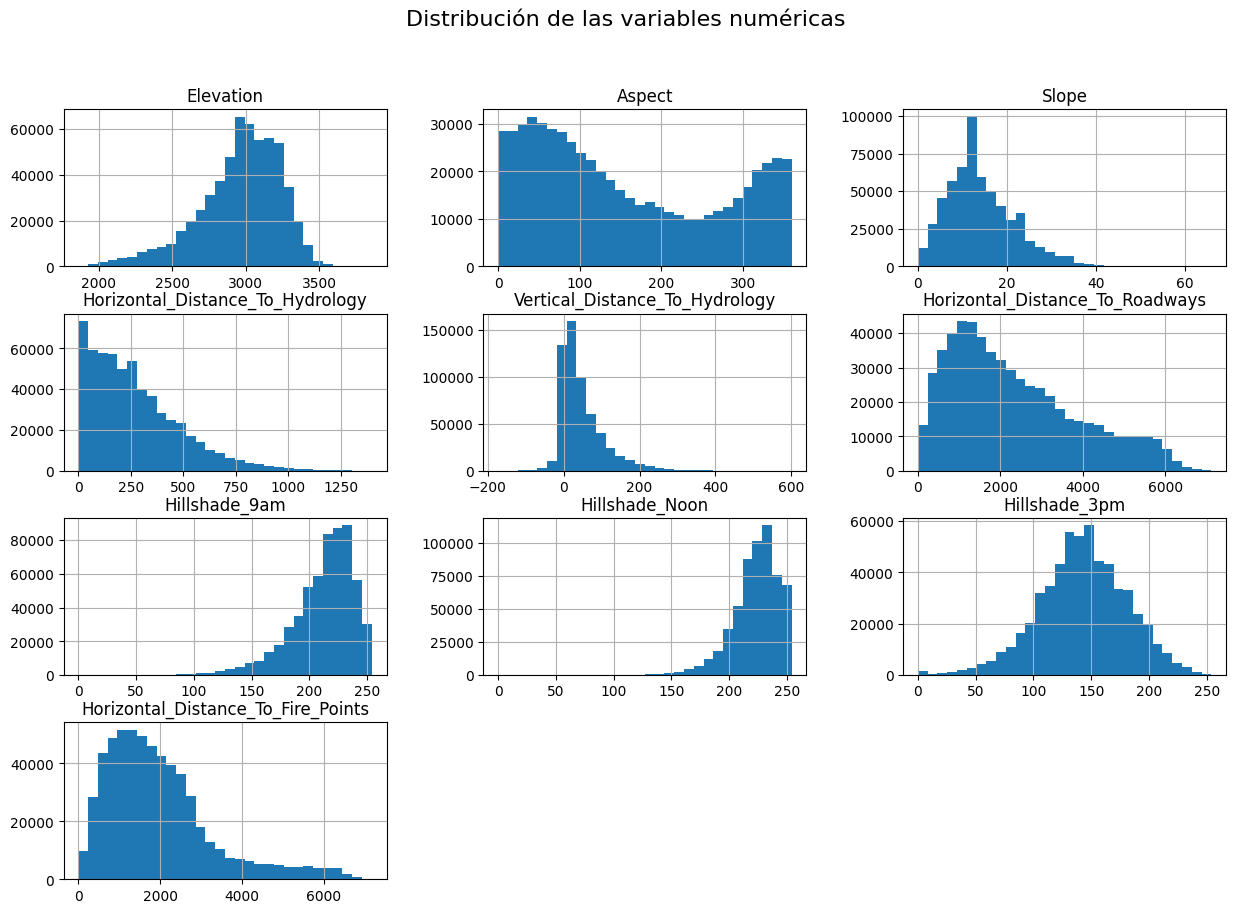

In [ ]:
num_cols = X.iloc[:, :10].columns

X[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()

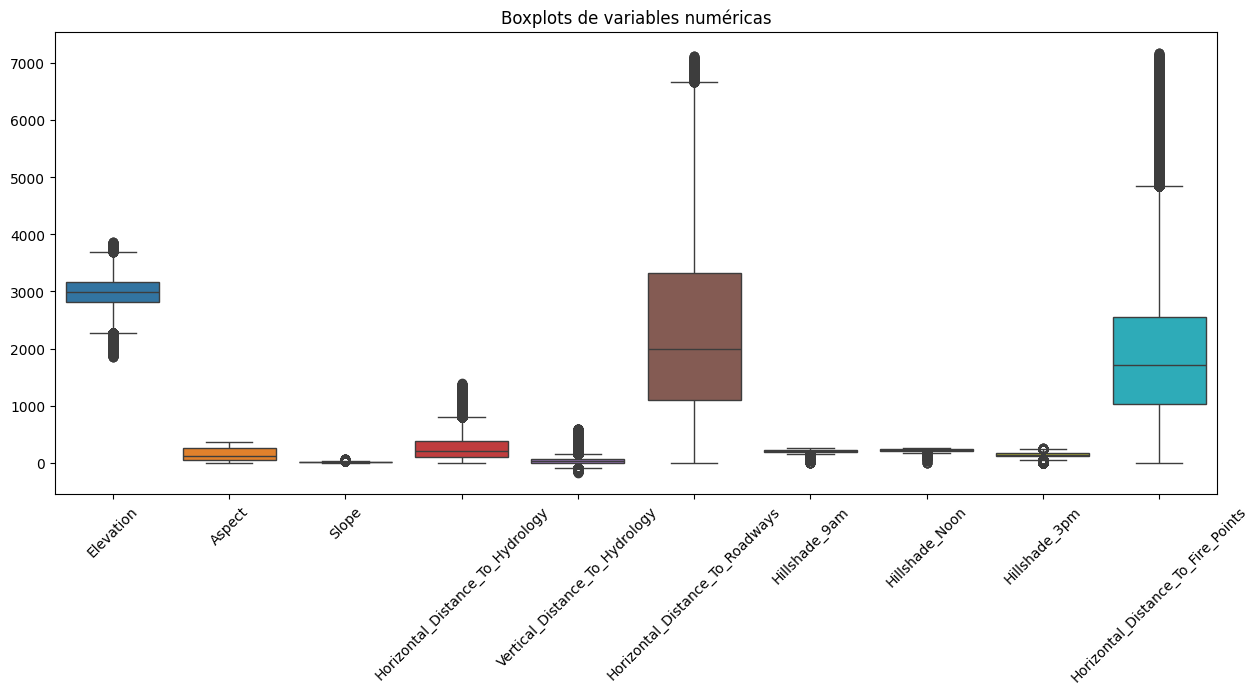

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=X[num_cols])
plt.title("Boxplots de variables numéricas")
plt.xticks(rotation=45)
plt.show()

## **5. Boxplots de las Cuantitativas**

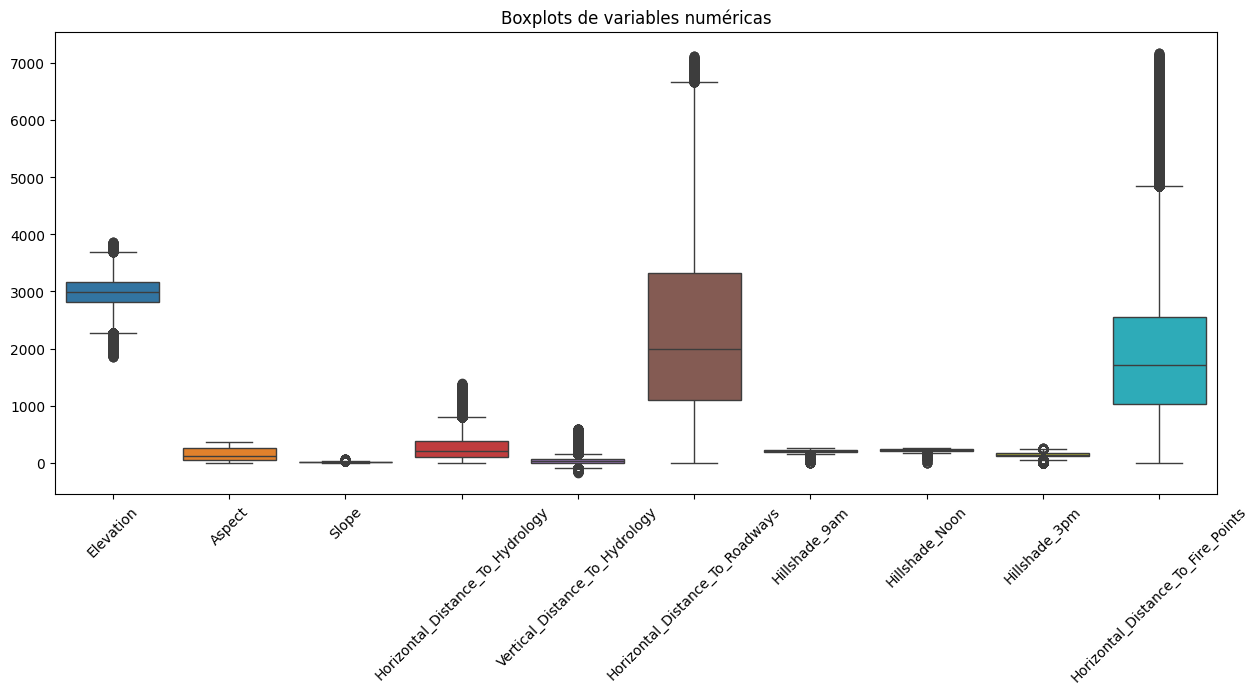

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=X[num_cols])
plt.title("Boxplots de variables numéricas")
plt.xticks(rotation=45)
plt.show()

# IQR

In [ ]:
import pandas as pd
import numpy as np

# Tus columnas numéricas
num_cols = X.iloc[:, :10].columns

iqr_results = []

for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Outliers
    outliers = X[(X[col] < lower) | (X[col] > upper)][col]
    outlier_pct = 100 * len(outliers) / len(X)

    iqr_results.append([col, Q1, Q3, IQR, lower, upper, outlier_pct])

iqr_df = pd.DataFrame(iqr_results, columns=[
    "Variable",
    "Q1",
    "Q3",
    "IQR",
    "Lower Bound",
    "Upper Bound",
    "% Outliers"
])

print("\n=== IQR y porcentaje de outliers por variable ===\n")
print(iqr_df)


=== IQR y porcentaje de outliers por variable ===

                             Variable      Q1      Q3     IQR  Lower Bound  \
0                           Elevation  2809.0  3163.0   354.0       2278.0   
1                              Aspect    58.0   260.0   202.0       -245.0   
2                               Slope     9.0    18.0     9.0         -4.5   
3    Horizontal_Distance_To_Hydrology   108.0   384.0   276.0       -306.0   
4      Vertical_Distance_To_Hydrology     7.0    69.0    62.0        -86.0   
5     Horizontal_Distance_To_Roadways  1106.0  3328.0  2222.0      -2227.0   
6                       Hillshade_9am   198.0   231.0    33.0        148.5   
7                      Hillshade_Noon   213.0   237.0    24.0        177.0   
8                       Hillshade_3pm   119.0   168.0    49.0         45.5   
9  Horizontal_Distance_To_Fire_Points  1024.0  2550.0  1526.0      -1265.0   

   Upper Bound  % Outliers  
0       3694.0    2.679635  
1        563.0    0.000000  
2 

## **6. Matriz de Correlación Cuantitativas**

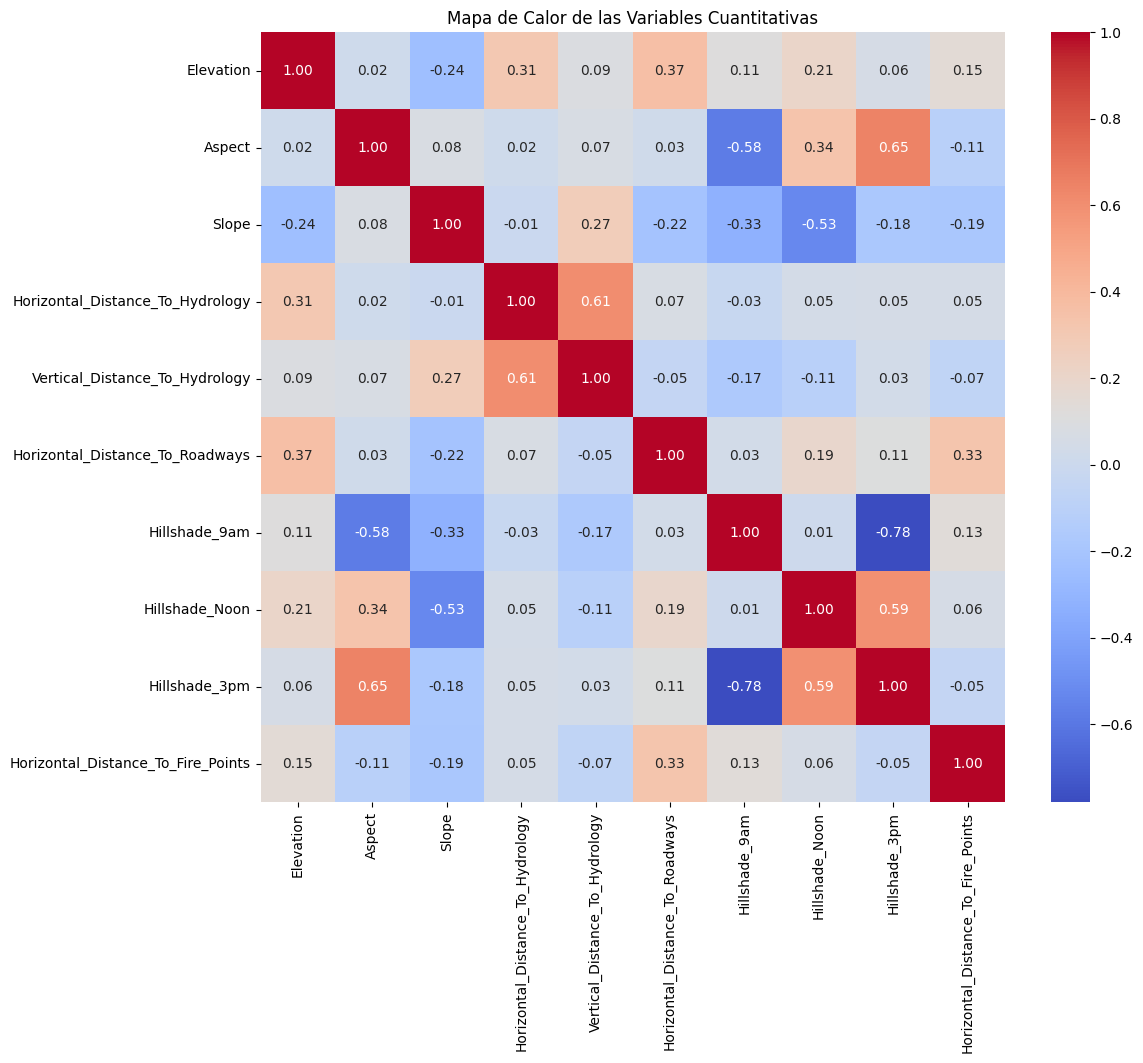

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de las Variables Cuantitativas')
plt.show()

In [ ]:
corr_with_target = df[num_cols].apply(lambda col: col.corr(df['Cover_Type']))
corr_with_target.sort_values(ascending=False)


,0
Slope,0.148285
Vertical_Distance_To_Hydrology,0.081664
Aspect,0.017080
Horizontal_Distance_To_Hydrology,-0.020317
Hillshade_9am,-0.035415
Hillshade_3pm,-0.048290
Hillshade_Noon,-0.096426
Horizontal_Distance_To_Fire_Points,-0.108936
Horizontal_Distance_To_Roadways,-0.153450
Elevation,-0.269554


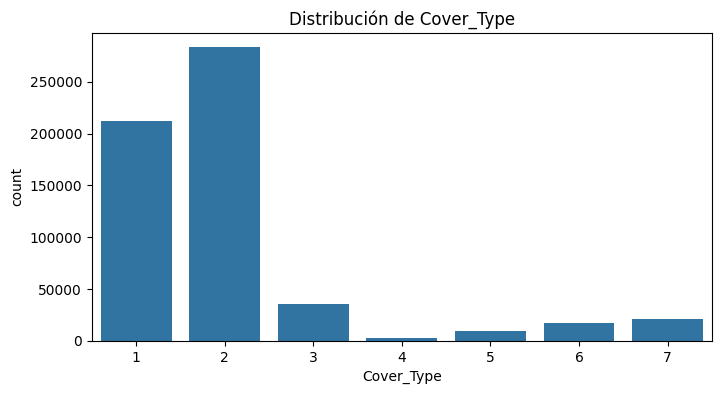

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Cover_Type'])
plt.title("Distribución de Cover_Type")
plt.show()

# **Separación de Predictoras (X) y Objetivo (Y)**

In [ ]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

In [ ]:
print("Train:", X_train.shape)
print("Valid:", X_valid.shape)
print("Test:", X_test.shape)

Train: (406708, 54)
Valid: (87152, 54)
Test: (87152, 54)


In [ ]:
pip install imbalanced-learn

# SMOTE

In [ ]:
# ============================================
# OVERSAMPLING (SMOTE)
# ============================================
from imblearn.over_sampling import SMOTE

print("\n--- Aplicando SMOTE (Oversampling) ---")
# print("Distribución antes de SMOTE:\n", y_train.value_counts(normalize=True))

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Dimensiones después de SMOTE:", X_train.shape)
# print("Distribución después de SMOTE:\n", y_train.value_counts(normalize=True))


--- Aplicando SMOTE (Oversampling) ---
Dimensiones después de SMOTE: (1388170, 54)


In [ ]:
pip install deap catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00


# Algoritmo Genetico

In [ ]:
# ============================================================
# 1. IMPORTS
# ============================================================
import numpy as np
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

# ============================================================
# 2. REPRODUCIBILIDAD GLOBAL
# ============================================================
random.seed(42)
np.random.seed(42)

# ============================================================
# 3. SPLIT INTERNO DEL TRAIN (EVITA LEAKAGE)
# ============================================================
X_ga_train, X_ga_valid, y_ga_train, y_ga_valid = train_test_split(
    X_train, y_train,
    test_size=0.20,
    random_state=42,
    stratify=y_train
)

# Convertir a NumPy (para acelerar GA)
X_ga_train_np = X_ga_train.values
X_ga_valid_np = X_ga_valid.values
y_ga_train_np = y_ga_train.values
y_ga_valid_np = y_ga_valid.values

n_features = X_ga_train_np.shape[1]

# ============================================================
# 4. DEFINICIÓN DE GA (DEAP)
# ============================================================
# Evitar recrear clases si ya existen
try:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
except:
    pass

try:
    creator.create("Individual", list, fitness=creator.FitnessMax)
except:
    pass

toolbox = base.Toolbox()

toolbox.register("attr_bool", lambda: random.randint(0, 1))

toolbox.register(
    "individual",
    tools.initRepeat,
    creator.Individual,
    toolbox.attr_bool,
    n_features
)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# ============================================================
# 5. FUNCIÓN DE FITNESS — GPU ESTABLE (SIN MULTIPROCESSING)
# ============================================================
def eval_individual(individual):

    if sum(individual) == 0:
        return (0.0,)

    cols = np.where(np.array(individual) == 1)[0]

    X_train_sel = X_ga_train_np[:, cols]
    X_valid_sel = X_ga_valid_np[:, cols]

    model = CatBoostClassifier(
        iterations=80,
        depth=6,
        learning_rate=0.1,
        loss_function="MultiClass",
        task_type="GPU",      # GPU ACTIVADA
        devices='0',
        verbose=False,
        random_seed=42
    )

    model.fit(
        X_train_sel, y_ga_train_np,
        eval_set=(X_valid_sel, y_ga_valid_np),
        early_stopping_rounds=10,
        verbose=False
    )

    preds = model.predict(X_valid_sel).reshape(-1).astype(int)
    acc = accuracy_score(y_ga_valid_np, preds)

    return (acc,)

toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

# ============================================================
# 6. EJECUCIÓN DEL GA — SIN MULTIPROCESSING
# ============================================================
N_POP = 40
N_GEN = 15

pop = toolbox.population(n=N_POP)
best_ind = tools.HallOfFame(1)

stats = tools.Statistics(lambda ind: ind.fitness.values[0])
stats.register("avg", np.mean)
stats.register("max", np.max)

pop, logbook = algorithms.eaSimple(
    pop,
    toolbox,
    cxpb=0.6,
    mutpb=0.2,
    ngen=N_GEN,
    stats=stats,
    halloffame=best_ind,
    verbose=True
)

# ============================================================
# 7. EXTRAER FEATURES GANADORES
# ============================================================
best_mask = np.array(best_ind[0])
selected_features = X_train.columns[best_mask == 1]

print("\n===== FEATURES SELECCIONADAS (GA) =====")
print(selected_features)
print(f"Total: {len(selected_features)}")

gen	nevals	avg     	max     
0  	40    	0.709975	0.795263
1  	27    	0.748003	0.795429
2  	28    	0.770057	0.795774
3  	23    	0.782452	0.795774
4  	23    	0.791217	0.795774
5  	25    	0.787629	0.796894
6  	37    	0.792222	0.796894
7  	24    	0.789941	0.796894
8  	29    	0.795138	0.799524
9  	23    	0.79151 	0.802294
10 	23    	0.79543 	0.802294
11 	19    	0.796342	0.802294
12 	32    	0.797019	0.802294
13 	27    	0.793207	0.802294
14 	33    	0.794267	0.802294
15 	29    	0.795841	0.802294

===== FEATURES SELECCIONADAS (GA) =====
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_Noon',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_3', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_9',
       'Soil_Type_11', 'Soil_Type_13', 'Soil_Type_15', 'Soil_Type_20',
       'Soil_Type_24', 'Soil_Type_27', 'Soil_Type_28',

In [ ]:
# ============================================================
# 7. EXTRAER FEATURES GANADORES + PRINTS DETALLADOS
# ============================================================

best_mask = np.array(best_ind[0])
selected_features = X_train.columns[best_mask == 1]

print("\n===== FEATURES SELECCIONADAS (GA) =====")
print(selected_features.tolist())
print(f"Total: {len(selected_features)}")

# ===== PRINT DEL MEJOR FITNESS GLOBAL =====
best_fitness = best_ind[0].fitness.values[0]
print("\n===== MEJOR FITNESS (Accuracy Valid) =====")
print(f"Best Fitness: {best_fitness:.5f}")

# ===== PRINT DEL PROGRESO POR GENERACIÓN =====
print("\n===== HISTORIAL DE FITNESS (por generación) =====")
for gen, record in enumerate(logbook):
    print(f"Gen {gen:02d} | Max: {record['max']:.5f} | Avg: {record['avg']:.5f}")


===== FEATURES SELECCIONADAS (GA) =====
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_3', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_9', 'Soil_Type_11', 'Soil_Type_13', 'Soil_Type_15', 'Soil_Type_20', 'Soil_Type_24', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_40']
Total: 31

===== MEJOR FITNESS (Accuracy Valid) =====
Best Fitness: 0.80229

===== HISTORIAL DE FITNESS (por generación) =====
Gen 00 | Max: 0.79526 | Avg: 0.70998
Gen 01 | Max: 0.79543 | Avg: 0.74800
Gen 02 | Max: 0.79577 | Avg: 0.77006
Gen 03 | Max: 0.79577 | Avg: 0.78245
Gen 04 | Max: 0.79577 | Avg: 0.79122
Gen 05 | Max: 0.79689 | Avg: 0.78763
Gen 06 | Max: 0.79689 | Avg: 0.79222
Gen 07 | Max: 0.79689 | Av

# CATBOOST

Usando 31 features
Primeras features: Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_Noon',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_3', 'Soil_Type_2'],
      dtype='object')
Tamaño train_full: (1475322, 31)
Tamaño test_final: (87152, 31)
Entrenando modelo final CatBoost (GPU, early stopping)...
0:	learn: 0.5930739	test: 0.5915119	best: 0.5915119 (0)	total: 124ms	remaining: 2m 3s
100:	learn: 0.8013457	test: 0.8004984	best: 0.8004984 (100)	total: 4.61s	remaining: 41s
200:	learn: 0.8468533	test: 0.8463768	best: 0.8463768 (200)	total: 8.44s	remaining: 33.6s
300:	learn: 0.8686279	test: 0.8677842	best: 0.8677842 (300)	total: 13.1s	remaining: 30.4s
400:	learn: 0.8837719	test: 0.8826786	best: 0.8826786 (400)	total: 17.2s	remaining: 25.7s
500:	learn: 0.8944742	test: 0.8937979	best: 0.8937979 (500)	total: 21.1s	remaining: 21s
600:	learn: 0.9030268	test: 0.9017602	bes

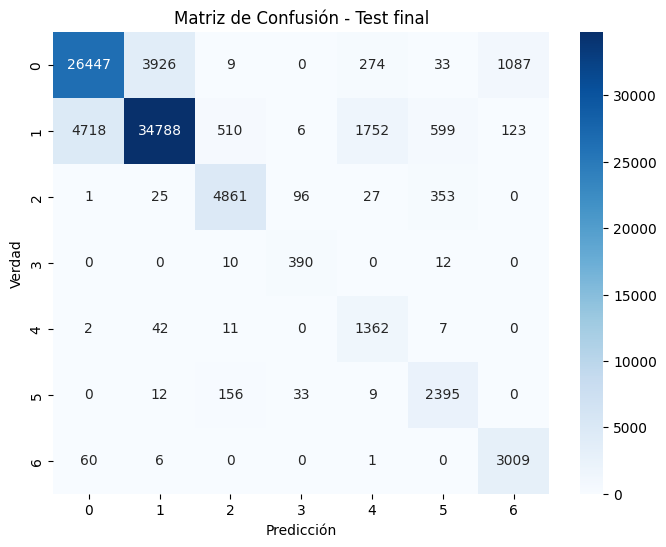

Modelo guardado en: /mnt/data/catboost_model_final.cbm
Features guardadas en: /mnt/data/selected_features_ga.txt


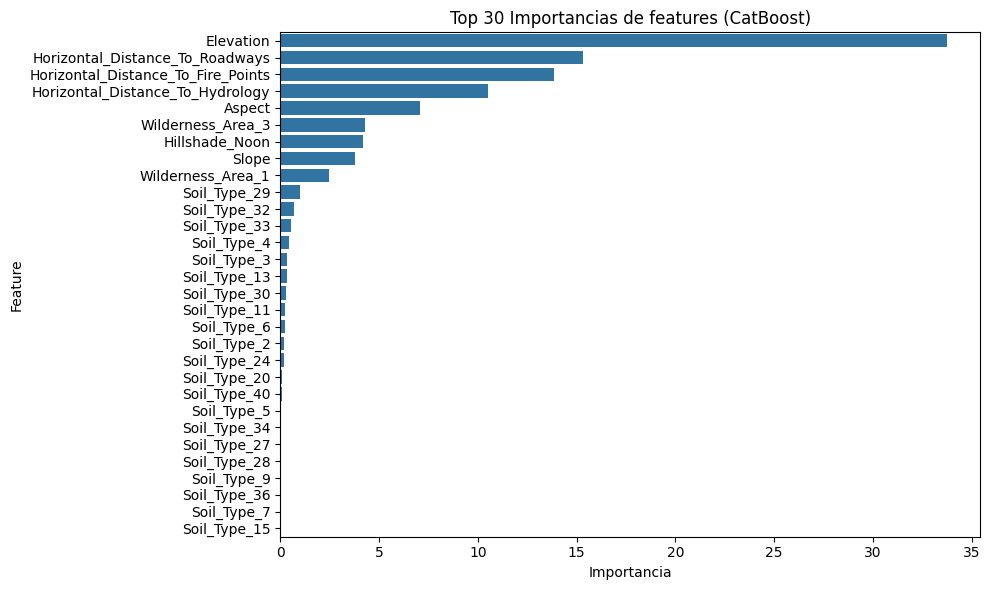

In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# ---------- 1) Seleccionar features (si GA devolvió selected_features) ----------

try:
    selected_features
    USE_SELECTED = True
except NameError:
    selected_features = list(X_train.columns)
    USE_SELECTED = False

print("Usando {} features".format(len(selected_features)))
print("Primeras features:", selected_features[:10])

# ---------- 2) Preparar train_full y test_final ----------

X_train_full = pd.concat([X_train[selected_features], X_valid[selected_features]], axis=0).astype(np.float32)
y_train_full = pd.concat([y_train, y_valid], axis=0)

X_test_final = X_test[selected_features].astype(np.float32)
y_test_final = y_test.copy()

print("Tamaño train_full:", X_train_full.shape)
print("Tamaño test_final:", X_test_final.shape)

# ---------- 3) Crear validación interna (submuestra 15%) ----------

X_train_cb, X_valid_cb, y_train_cb, y_valid_cb = train_test_split(
    X_train_full, y_train_full, test_size=0.15, stratify=y_train_full, random_state=42
)

train_pool = Pool(X_train_cb, y_train_cb)
valid_pool = Pool(X_valid_cb, y_valid_cb)

# ---------- 4) Crear y entrenar CatBoost optimizado ----------

model_final = CatBoostClassifier(
    iterations=1000,         # CatBoost detendrá con early stopping
    depth=8,                 # REDUCIDO: DE 6 A 4
    learning_rate=0.05,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    l2_leaf_reg=1.0,         # APLICANDO REGULARIZACIÓN L2
    task_type='GPU',
    devices='0',
    thread_count=-1,
    random_seed=42,
    verbose=100,
)

print("Entrenando modelo final CatBoost (GPU, early stopping)...")
model_final.fit(
    train_pool,
    eval_set=valid_pool,
    early_stopping_rounds=100,
    use_best_model=True,
    verbose=100
)

# ---------- 5) Evaluación en test ----------

y_pred = np.array(model_final.predict(X_test_final)).reshape(-1)

acc = accuracy_score(y_test_final, y_pred)
bal_acc = balanced_accuracy_score(y_test_final, y_pred)
f1_macro = f1_score(y_test_final, y_pred, average='macro')

print("\nRESULTADOS FINALES EN TEST")
print("Accuracy:", acc)
print("Balanced Accuracy:", bal_acc)
print(f"F1 (macro): {f1_macro}")
print("\nClassification report:\n")
print(classification_report(y_test_final, y_pred, digits=4))

# Matriz de confusión

cm = confusion_matrix(y_test_final, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Test final')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

# ---------- 6) Guardar modelo y features ----------

output_dir = "/mnt/data/"
os.makedirs(output_dir, exist_ok=True)

model_path = os.path.join(output_dir, "catboost_model_final.cbm")
joblib.dump(model_final, model_path)
print("Modelo guardado en:", model_path)

features_path = os.path.join(output_dir, "selected_features_ga.txt")
with open(features_path, "w") as f:
    for feat in selected_features:
        f.write(feat + "\n")
print("Features guardadas en:", features_path)

# ---------- 7) Importancia de features ----------

importances = model_final.get_feature_importance(train_pool)
feat_imp = pd.Series(importances, index=selected_features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:30], y=feat_imp.index[:30])
plt.title("Top 30 Importancias de features (CatBoost)")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Probabilidades por clase
y_proba = model_final.predict_proba(X_test_final)

# AUC Micro Promedio
roc_auc_cb = roc_auc_score(y_test_final, y_proba, multi_class='ovr', average='micro')

print(f"AUC Micro-Average: {roc_auc_cb:.4f}")


AUC Micro-Average: 0.9865


# RANDOM FOREST

In [ ]:
import numpy as np
import pandas as pd
import random
from collections import Counter

from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix
)

# ---------------------------
# Reproducibilidad global
# ---------------------------
random.seed(42)
np.random.seed(42)

# ---------------------------
# Funciones auxiliares
# ---------------------------

def gini_impurity(y):
    """Calcula la impureza de Gini para un vector de etiquetas."""
    if len(y) == 0:
        return 0.0
    counts = np.bincount(y)
    probs = counts / counts.sum()
    return 1.0 - np.sum(probs ** 2)

def majority_class(y):
    """Devuelve la clase mayoritaria."""
    if len(y) == 0:
        return None
    return Counter(y).most_common(1)[0][0]

# ---------------------------
# Optimized split search
# ---------------------------

def find_best_split_classification_np(X, y, min_points_leaf, n_features_split=None):
    """
    Encuentra el mejor split que minimiza el Gini ponderado usando NumPy.
    - X: np.array (n_samples, n_features)
    - y: np.array (n_samples,)
    """
    n_samples, n_features = X.shape
    best_gini = float("inf")
    best_split = None

    if n_features_split is not None and n_features_split < n_features:
        features_to_check = np.random.choice(n_features, n_features_split, replace=False)
    else:
        features_to_check = np.arange(n_features)

    for feature_idx in features_to_check:
        X_col = X[:, feature_idx]
        unique_values = np.unique(X_col)
        if len(unique_values) < 2:
            continue

        # Generar candidatos de split
        if len(unique_values) > 100:
            candidates = np.percentile(X_col, np.linspace(0, 100, 102)[1:-1])
            candidates = np.unique(candidates)
        else:
            candidates = (unique_values[:-1] + unique_values[1:]) / 2.0

        for threshold in candidates:
            left_mask = X_col < threshold
            right_mask = ~left_mask
            if left_mask.sum() < min_points_leaf or right_mask.sum() < min_points_leaf:
                continue

            y_left = y[left_mask]
            y_right = y[right_mask]

            gini_left = gini_impurity(y_left)
            gini_right = gini_impurity(y_right)
            weighted_gini = (len(y_left) / n_samples) * gini_left + (len(y_right) / n_samples) * gini_right

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_split = {
                    "feature_idx": feature_idx,
                    "threshold": threshold,
                    "gini": weighted_gini,
                    "left_mask": left_mask,
                    "right_mask": right_mask
                }
    return best_split

# ---------------------------
# Construcción de árbol
# ---------------------------

def build_tree_classification_np(X, y, min_points_leaf=10, max_depth=5, current_depth=0, max_features_split=None):
    """Construye árbol recursivamente usando arrays de NumPy."""

    # Casos base
    if len(y) < 2 * min_points_leaf or current_depth >= max_depth or len(np.unique(y)) == 1:
        return {
            "type": "leaf",
            "value": majority_class(y),
            "n_samples": len(y)
        }

    split = find_best_split_classification_np(X, y, min_points_leaf, max_features_split)
    if split is None:
        return {
            "type": "leaf",
            "value": majority_class(y),
            "n_samples": len(y)
        }

    X_left = X[split["left_mask"]]
    y_left = y[split["left_mask"]]
    X_right = X[split["right_mask"]]
    y_right = y[split["right_mask"]]

    node = {
        "type": "node",
        "feature_idx": split["feature_idx"],
        "threshold": split["threshold"],
        "gini": split["gini"],
        "n_samples": len(y),
        "left": build_tree_classification_np(X_left, y_left, min_points_leaf, max_depth, current_depth + 1, max_features_split),
        "right": build_tree_classification_np(X_right, y_right, min_points_leaf, max_depth, current_depth + 1, max_features_split)
    }

    return node

# ---------------------------
# Entrenamiento Random Forest
# ---------------------------

def train_random_forest_np(X_train, y_train, n_trees=5, min_points_leaf=10, max_depth=5, max_features="sqrt", sample_size=None):
    """Entrena Random Forest optimizado con NumPy."""

    X_train_np = X_train.values
    y_train_np = y_train.values.astype(int)
    n_samples, n_features = X_train_np.shape

    if isinstance(max_features, str):
        if max_features == "sqrt":
            n_features_split = max(1, int(np.sqrt(n_features)))
        elif max_features == "log2":
            n_features_split = max(1, int(np.log2(n_features)))
        else:
            n_features_split = n_features
    elif isinstance(max_features, int):
        n_features_split = min(max_features, n_features)
    else:
        n_features_split = n_features

    if sample_size is None:
        sample_size = n_samples

    forest = []
    for i in range(n_trees):
        print(f"Building tree {i+1} of {n_trees}...")
        indices = np.random.choice(n_samples, sample_size, replace=True)
        X_sample = X_train_np[indices]
        y_sample = y_train_np[indices]
        tree = build_tree_classification_np(X_sample, y_sample, min_points_leaf, max_depth, 0, n_features_split)
        forest.append(tree)

    return forest

# ---------------------------
# Predicción Random Forest
# ---------------------------

def predict_tree_np(node, x_row):
    if node["type"] == "leaf":
        return node["value"]
    if x_row[node["feature_idx"]] < node["threshold"]:
        return predict_tree_np(node["left"], x_row)
    else:
        return predict_tree_np(node["right"], x_row)

def predict_random_forest_np(forest, X):
    X_np = X.values
    y_pred = []
    for i in range(X_np.shape[0]):
        votes = [predict_tree_np(tree, X_np[i]) for tree in forest]
        y_pred.append(majority_class(votes))
    return np.array(y_pred)

# ---------------------------
# EJEMPLO DE USO
# ---------------------------

# Asume que X_train, y_train, X_test_final, y_test_final ya existen
RF_N_TREES = 50 # Increased from 20
RF_MAX_DEPTH = 15 # Increased from 12
RF_MIN_SAMPLES = 5

# Usar solo las selected_features para entrenar el RF
X_train_rf_subset = X_train[selected_features]
print(f"Shape of X_train used for RF: {X_train_rf_subset.shape}") # Debugging line
forest = train_random_forest_np(X_train_rf_subset, y_train, n_trees=RF_N_TREES, min_points_leaf=RF_MIN_SAMPLES, max_depth=RF_MAX_DEPTH)

# Predecir en el conjunto de prueba final
y_pred = predict_random_forest_np(forest, X_test_final)

acc_rf = accuracy_score(y_test_final, y_pred)
bal_acc_rf = balanced_accuracy_score(y_test_final, y_pred)

print("\n=== RANDOM FOREST MANUAL (OPTIMIZED) ===")
print(f"Accuracy:          {acc_rf:.4f}")
print(f"Balanced Accuracy: {bal_acc_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_final, y_pred))

Shape of X_train used for RF: (1388170, 31)
Building tree 1 of 50...
Building tree 2 of 50...
Building tree 3 of 50...
Building tree 4 of 50...
Building tree 5 of 50...
Building tree 6 of 50...
Building tree 7 of 50...
Building tree 8 of 50...
Building tree 9 of 50...
Building tree 10 of 50...
Building tree 11 of 50...
Building tree 12 of 50...
Building tree 13 of 50...
Building tree 14 of 50...
Building tree 15 of 50...
Building tree 16 of 50...
Building tree 17 of 50...
Building tree 18 of 50...
Building tree 19 of 50...
Building tree 20 of 50...
Building tree 21 of 50...
Building tree 22 of 50...
Building tree 23 of 50...
Building tree 24 of 50...
Building tree 25 of 50...
Building tree 26 of 50...
Building tree 27 of 50...
Building tree 28 of 50...
Building tree 29 of 50...
Building tree 30 of 50...
Building tree 31 of 50...
Building tree 32 of 50...
Building tree 33 of 50...
Building tree 34 of 50...
Building tree 35 of 50...
Building tree 36 of 50...
Building tree 37 of 50...
Bui

In [ ]:
# Probabilidades estimadas por votos del RF manual
def predict_proba_random_forest_np(forest, X, classes):
    X_np = X.values
    proba = np.zeros((X_np.shape[0], len(classes))) # Número de columnas = número de clases reales

    for i in range(X_np.shape[0]):
        votes = [predict_tree_np(tree, X_np[i]) for tree in forest]
        counts = Counter(votes)
        total = len(votes)
        for idx, c_label in enumerate(classes): # Iterar sobre las etiquetas de clase reales
            proba[i, idx] = counts[c_label] / total  # Asignar a la columna correcta

    return proba

# Obtener las clases únicas para asegurar el orden correcto en el array de probabilidades
classes = np.unique(y_train)

# Obtener probabilidades
y_pred_proba_rf = predict_proba_random_forest_np(forest, X_test_final, classes)

# AUC micro y macro
auc_micro_rf = roc_auc_score(y_test_final, y_pred_proba_rf, multi_class='ovr', average='micro', labels=classes)
auc_macro_rf = roc_auc_score(y_test_final, y_pred_proba_rf, multi_class='ovr', average='macro', labels=classes)

print("=== AUC RANDOM FOREST MANUAL ===")
print(f"AUC Micro: {auc_micro_rf:.6f}")
print(f"AUC Macro: {auc_macro_rf:.6f}")

from sklearn.metrics import f1_score

f1_macro_rf = f1_score(y_test_final, y_pred, average='macro')
print(f"F1 Score (Macro):  {f1_macro_rf:.4f}")


=== AUC RANDOM FOREST MANUAL ===
AUC Micro: 0.947762
AUC Macro: 0.957897
F1 Score (Macro):  0.6316


VISUALIZAR PRIMER ÁRBOL

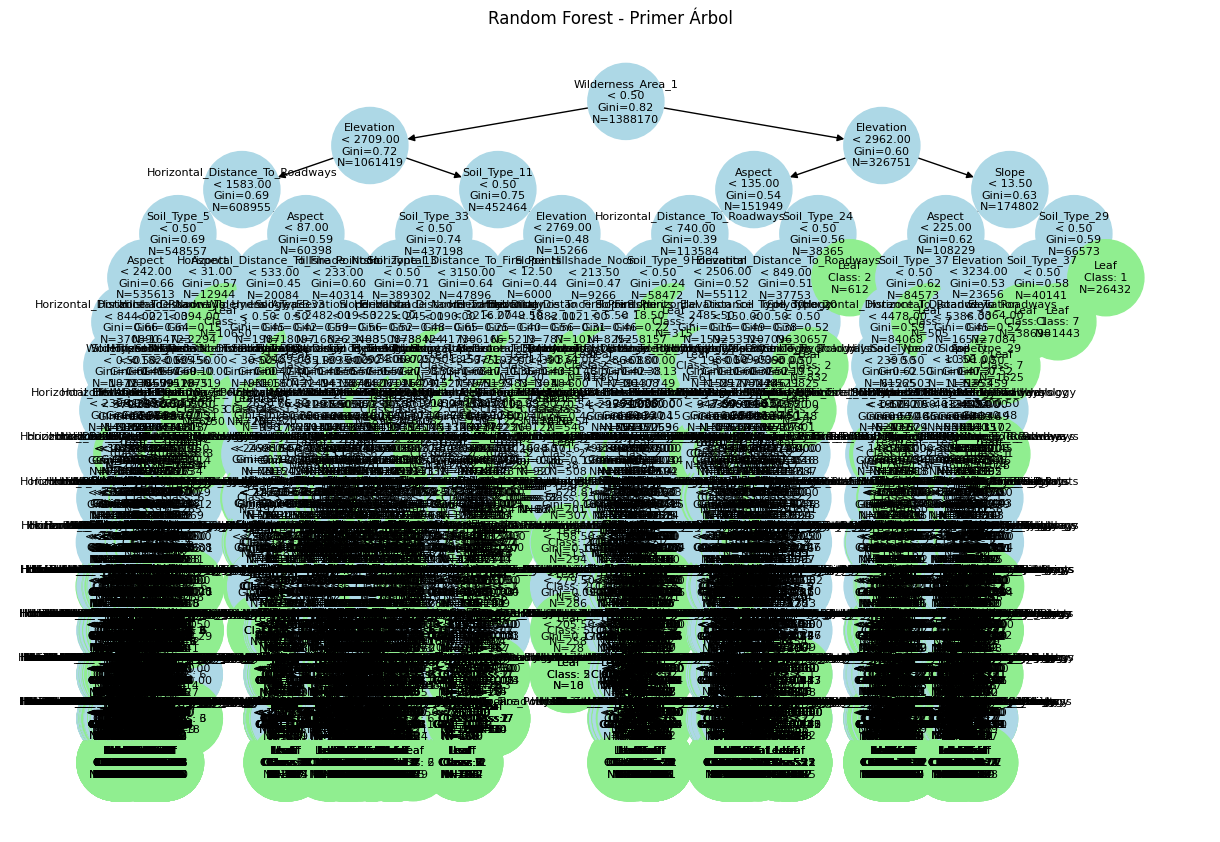

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_tree_np(node, feature_names=None):
    """
    Visualiza un árbol de decisión construido con la versión NumPy.
    - node: diccionario del árbol.
    - feature_names: lista de nombres de columnas para mostrar (opcional)
    """
    G = nx.DiGraph()
    pos = {}
    labels = {}

    def _add_node(n, parent=None, x=0.0, y=0.0, dx=1.0):
        node_id = id(n)

        if n['type'] == 'leaf':
            label = f"Leaf\nClass: {n['value']}\nN={n['n_samples']}"
            color = "#90EE90"
        else:
            feat_name = feature_names[n['feature_idx']] if feature_names is not None else f"F{n['feature_idx']}"
            label = f"{feat_name}\n< {n['threshold']:.2f}\nGini={n['gini']:.2f}\nN={n['n_samples']}"
            color = "#ADD8E6"

        G.add_node(node_id, label=label, color=color)
        pos[node_id] = (x, y)
        labels[node_id] = label

        if parent is not None:
            G.add_edge(parent, node_id)

        if n['type'] == 'node':
            _add_node(n['left'], parent=node_id, x=x - dx, y=y - 1, dx=dx / 2)
            _add_node(n['right'], parent=node_id, x=x + dx, y=y - 1, dx=dx / 2)

    _add_node(node)

    plt.figure(figsize=(12, 8))
    node_colors = [nx.get_node_attributes(G, 'color')[n] for n in G.nodes()]
    nx.draw(G, pos, with_labels=False, node_size=3000, node_color=node_colors, arrows=True)
    nx.draw_networkx_labels(G, pos, labels, font_size=8)
    plt.title("Random Forest - Primer Árbol")
    plt.axis("off")
    plt.show()

# Uso: visualizar el primer árbol del bosque
# La lista de feature_names debe corresponder a las columnas usadas para entrenar el bosque
plot_tree_np(forest[0], feature_names=selected_features.tolist()) # Usar selected_features

GENERAR ARBOL EN PNG

In [ ]:
!pip install graphviz
import graphviz

def tree_to_dot(node, feature_names=None, parent=None, graph=None, counter=[0], max_depth=None, current_depth=0):
    """
    Convierte un árbol de diccionario (versión NumPy) a formato DOT, con límite de profundidad.
    - node: árbol como diccionario
    - feature_names: lista de nombres de features
    - parent: id del nodo padre
    - graph: instancia de Digraph
    - counter: contador interno para generar IDs únicos
    - max_depth: profundidad máxima a la que se dibujar el árbol. None para sin límite.
    - current_depth: profundidad actual del nodo. (uso interno)
    """
    if graph is None:
        graph = graphviz.Digraph(format='png')
        graph.attr('node', style='filled', shape='box', fontname='Helvetica')

    node_id = str(counter[0])
    counter[0] += 1

    # Etiqueta
    if node['type'] == 'leaf':
        label = f"Leaf\nClass: {node['value']}\nN={node['n_samples']}"
        color = 'lightgreen'
    elif max_depth is not None and current_depth >= max_depth:
        # This is an internal node being truncated due to max_depth
        # It will not have a 'value' key, but rather split info
        feat_name = feature_names[node['feature_idx']] if feature_names else f"F{node['feature_idx']}"
        label = f"Truncated Node\n{feat_name} < {node['threshold']:.2f}\nN={node['n_samples']}"
        color = 'orange' # Use a different color to indicate truncation
    else: # This is a regular internal node not yet truncated
        feat_name = feature_names[node['feature_idx']] if feature_names else f"F{node['feature_idx']}"
        label = f"{feat_name} < {node['threshold']:.2f}\nGini={node['gini']:.2f}\nN={node['n_samples']}"
        color = 'lightblue'

    graph.node(node_id, label=label, fillcolor=color)

    # Conectar con el padre
    if parent is not None:
        graph.edge(parent, node_id)

    # Recursivo si no es hoja y no se ha alcanzado la profundidad máxima
    if node['type'] == 'node' and (max_depth is None or current_depth < max_depth):
        tree_to_dot(node['left'], feature_names, parent=node_id, graph=graph, counter=counter, max_depth=max_depth, current_depth=current_depth + 1)
        tree_to_dot(node['right'], feature_names, parent=node_id, graph=graph, counter=counter, max_depth=max_depth, current_depth=current_depth + 1)

    return graph

# Usar la función con tu primer árbol y una profundidad máxima limitada para una mejor visualización
feature_names = X_train.columns.tolist()
dot_graph = tree_to_dot(forest[0], feature_names, max_depth=3) # Limitar a 3 niveles de profundidad

# Renderizar y mostrar en Colab
dot_graph.render('tree_rf', view=True)


'tree_rf.png'

# Comparaciones entre los modelos

##  Non-Oversampled Training Data
Conjuntos de entrenamiento (`X_train_no_smote`, `y_train_no_smote`) a partir de los datos originales (`X`, `y`), manteniendo todas las 54 características originales. Esto servirá como base para que el nuevo GA realice su selección.


In [ ]:
print("Preparando conjuntos de datos sin SMOTE (non-oversampled) y manteniendo todas las 54 características originales...")

# 1. Identificar los índices del conjunto de prueba final en el DataFrame original X
# X_test_final.index contiene los índices originales de los datos que fueron a test
excluded_test_indices = X_test_final.index

# Crear una máscara para seleccionar las filas que NO están en el conjunto de prueba final
non_test_mask = ~X.index.isin(excluded_test_indices)

# 2. Crear X_train_no_smote usando TODAS las columnas de X y excluyendo los índices de test
X_train_no_smote_all_features = X.loc[non_test_mask, :].copy() # Usar todas las columnas

# 3. Crear y_train_no_smote excluyendo los índices de test
y_train_no_smote_all_features = y.loc[non_test_mask].copy()

# 4. Verificar las dimensiones
print(f"Dimensiones de X_train_no_smote_all_features: {X_train_no_smote_all_features.shape}")
print(f"Dimensiones de y_train_no_smote_all_features: {y_train_no_smote_all_features.shape}")
print(f"Primeras 5 filas de X_train_no_smote_all_features:\n{X_train_no_smote_all_features.head()}")
print(f"Primeras 5 filas de y_train_no_smote_all_features:\n{y_train_no_smote_all_features.head()}")

# 5. Verificar que los índices de X_train_no_smote_all_features y y_train_no_smote_all_features sean los mismos y que no se superpongan con X_test_final
assert X_train_no_smote_all_features.index.equals(y_train_no_smote_all_features.index)
assert not X_train_no_smote_all_features.index.isin(X_test_final.index).any()
print("Verificaciones de índices completadas: no hay superposición con el conjunto de prueba.")

# Actualizar la variable n_features_no_smote_updated
n_features_no_smote_updated = X_train_no_smote_all_features.shape[1]
print(f"Número de características en X_train_no_smote_all_features (n_features_no_smote_updated): {n_features_no_smote_updated}")

Preparando conjuntos de datos sin SMOTE (non-oversampled) y manteniendo todas las 54 características originales...
Dimensiones de X_train_no_smote_all_features: (493860, 54)
Dimensiones de y_train_no_smote_all_features: (493860,)
Primeras 5 filas de X_train_no_smote_all_features:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118               

Razonamiento: El paso anterior preparó con éxito X_train_no_smote_all_features y y_train_no_smote_all_features con todas las características originales. Para alinearse con la estructura de código existente del GA y proceder con la selección de características, ahora actualizaré las variables X_train_no_smote y y_train_no_smote para que hagan referencia a estos conjuntos de datos recién preparados.


In [ ]:
print("Actualizando X_train_no_smote y y_train_no_smote para usar los datasets con todas las características originales...")

X_train_no_smote = X_train_no_smote_all_features
y_train_no_smote = y_train_no_smote_all_features

print(f"X_train_no_smote ahora tiene dimensiones: {X_train_no_smote.shape}")
print(f"y_train_no_smote ahora tiene dimensiones: {y_train_no_smote.shape}")

Actualizando X_train_no_smote y y_train_no_smote para usar los datasets con todas las características originales...
X_train_no_smote ahora tiene dimensiones: (493860, 54)
y_train_no_smote ahora tiene dimensiones: (493860,)


Razonamiento: Ahora que X_train_no_smote y y_train_no_smote están correctamente preparados con todas las características originales, ejecutaré el Algoritmo Genético para la selección de características en estos conjuntos de datos. Esto implica dividirlos para el entrenamiento y la validación del GA, definir una función de evaluación para CatBoost, y ejecutar el GA para identificar el subconjunto óptimo de características para los datos no sobremuestreados.



In [ ]:
print("### Ejecutando GA Feature Selection (No Oversampling) ###")

# ============================================================
# 1. SPLIT INTERNO DEL TRAIN (EVITA LEAKAGE) para GA sin SMOTE
# ============================================================
X_ga_train_no_smote, X_ga_valid_no_smote, y_ga_train_no_smote, y_ga_valid_no_smote = train_test_split(
    X_train_no_smote, y_train_no_smote,
    test_size=0.20,
    random_state=42,
    stratify=y_train_no_smote
)

# Convertir a NumPy (para acelerar GA)
X_ga_train_no_smote_np = X_ga_train_no_smote.values
X_ga_valid_no_smote_np = X_ga_valid_no_smote.values
y_ga_train_no_smote_np = y_ga_train_no_smote.values
y_ga_valid_no_smote_np = y_ga_valid_no_smote.values

n_features_no_smote_updated_local = X_ga_train_no_smote_np.shape[1] # Using updated feature count

print(f"Dimensiones de X_ga_train_no_smote: {X_ga_train_no_smote.shape}")
print(f"Dimensiones de X_ga_valid_no_smote: {X_ga_valid_no_smote.shape}")
print(f"Número de características para GA (sin SMOTE, local): {n_features_no_smote_updated_local}")

# ============================================================
# 2. FUNCIÓN DE FITNESS ADAPTADA para GA sin SMOTE
# ============================================================
def eval_individual_no_smote(individual):

    if sum(individual) == 0:
        return (0.0,)

    cols = np.where(np.array(individual) == 1)[0]

    X_train_sel = X_ga_train_no_smote_np[:, cols]
    X_valid_sel = X_ga_valid_no_smote_np[:, cols]

    model = CatBoostClassifier(
        iterations=80,
        depth=6,
        learning_rate=0.1,
        loss_function="MultiClass",
        task_type="GPU",      # GPU ACTIVADA
        devices='0',
        verbose=False,
        random_seed=42
    )

    model.fit(
        X_train_sel, y_ga_train_no_smote_np,
        eval_set=(X_valid_sel, y_ga_valid_no_smote_np),
        early_stopping_rounds=10,
        verbose=False
    )

    preds = model.predict(X_valid_sel).reshape(-1).astype(int)
    acc = accuracy_score(y_ga_valid_no_smote_np, preds)

    return (acc,)

# ============================================================
# 3. RE-REGISTRO DE TOOLBOX PARA GA SIN SMOTE
# ============================================================
# Limpiar el toolbox para reconfigurarlo
toolbox = base.Toolbox()

try:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
except:
    pass

try:
    creator.create("Individual", list, fitness=creator.FitnessMax)
except:
    pass

toolbox.register("attr_bool", lambda: random.randint(0, 1))
toolbox.register(
    "individual",
    tools.initRepeat,
    creator.Individual,
    toolbox.attr_bool,
    n_features_no_smote_updated_local # Usar el número de características actualizado
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_individual_no_smote)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

# ============================================================
# 4. EJECUCIÓN DEL GA — SIN SMOTE
# ============================================================
N_POP = 40
N_GEN = 15

print(f"Comenzando el algoritmo genético con {N_POP} individuos y {N_GEN} generaciones (sin SMOTE)...")
pop_no_smote = toolbox.population(n=N_POP)
best_ind_no_smote = tools.HallOfFame(1)

stats_no_smote = tools.Statistics(lambda ind: ind.fitness.values[0])
stats_no_smote.register("avg", np.mean)
stats_no_smote.register("max", np.max)

pop_no_smote, logbook_no_smote = algorithms.eaSimple(
    pop_no_smote,
    toolbox,
    cxpb=0.6,
    mutpb=0.2,
    ngen=N_GEN,
    stats=stats_no_smote,
    halloffame=best_ind_no_smote,
    verbose=True
)

# ============================================================
# 5. EXTRAER FEATURES GANADORES (SIN SMOTE)
# ============================================================
best_mask_no_smote = np.array(best_ind_no_smote[0])
selected_features_no_smote = X_train_no_smote.columns[best_mask_no_smote == 1]

print("\n===== FEATURES SELECCIONADAS (GA sin SMOTE) =====")
print(selected_features_no_smote.tolist())
print(f"Total: {len(selected_features_no_smote)}")

print("\n===== MEJOR FITNESS (Accuracy Valid, sin SMOTE) =====")
best_fitness_no_smote = best_ind_no_smote[0].fitness.values[0]
print(f"Best Fitness: {best_fitness_no_smote:.5f}")

### Ejecutando GA Feature Selection (No Oversampling) ###
Dimensiones de X_ga_train_no_smote: (395088, 54)
Dimensiones de X_ga_valid_no_smote: (98772, 54)
Número de características para GA (sin SMOTE, local): 54
Comenzando el algoritmo genético con 40 individuos y 15 generaciones (sin SMOTE)...
gen	nevals	avg     	max     
0  	40    	0.702996	0.757836
1  	27    	0.731318	0.758758
2  	28    	0.747953	0.759871
3  	23    	0.75318 	0.761582
4  	23    	0.758538	0.762058
5  	25    	0.755369	0.762058
6  	37    	0.759883	0.762787
7  	24    	0.757473	0.762787
8  	29    	0.760862	0.762362
9  	23    	0.757312	0.762564
10 	23    	0.760362	0.762564
11 	19    	0.761111	0.762838
12 	32    	0.76088 	0.762686
13 	27    	0.758592	0.76384 
14 	33    	0.759123	0.76387 
15 	29    	0.75993 	0.765075

===== FEATURES SELECCIONADAS (GA sin SMOTE) =====
['Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noo

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import numpy as np

print("Entrenando un nuevo CatBoostClassifier sin SMOTE, usando características seleccionadas por GA...")

# 1. Filtrar los conjuntos de datos de entrenamiento y prueba final con las características seleccionadas
X_train_no_smote_filtered = X_train_no_smote[selected_features_no_smote].astype(np.float32)
X_test_final_filtered = X_test[selected_features_no_smote].astype(np.float32) # Corrected: Use X_test (full features) as base

# 2. Crear un sub-split para la validación interna de CatBoost (del conjunto de entrenamiento sin SMOTE)
X_train_cb_no_smote_filtered, X_valid_cb_no_smote_filtered, y_train_cb_no_smote_filtered, y_valid_cb_no_smote_filtered = train_test_split(
    X_train_no_smote_filtered, y_train_no_smote,
    test_size=0.15,
    stratify=y_train_no_smote,
    random_state=42
)

# Crear Pool para el entrenamiento y validación
train_pool_no_smote_ga = Pool(X_train_cb_no_smote_filtered, y_train_cb_no_smote_filtered)
valid_pool_no_smote_ga = Pool(X_valid_cb_no_smote_filtered, y_valid_cb_no_smote_filtered)

# 3. Inicializar y entrenar el modelo CatBoost con las características seleccionadas
model_no_smote_ga = CatBoostClassifier(
    iterations=1000,
    depth=4,
    learning_rate=0.05,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    l2_leaf_reg=1.0,
    task_type='GPU',
    devices='0',
    thread_count=-1,
    random_seed=42,
    verbose=100,
)

print("Comenzando el entrenamiento del modelo CatBoost sin SMOTE (con GA Features)...")
model_no_smote_ga.fit(
    train_pool_no_smote_ga,
    eval_set=valid_pool_no_smote_ga,
    early_stopping_rounds=100,
    use_best_model=True,
    verbose=100
)

print("Entrenamiento del modelo CatBoost sin SMOTE (con GA Features) completado.")

# 4. Evaluación en el conjunto de prueba final
print("Evaluando el modelo CatBoost sin SMOTE (con GA Features) en el conjunto de prueba final...")
y_pred_no_smote_ga = np.array(model_no_smote_ga.predict(X_test_final_filtered)).reshape(-1)
y_proba_no_smote_ga = model_no_smote_ga.predict_proba(X_test_final_filtered)

# Calcular métricas
acc_no_smote_ga = accuracy_score(y_test_final, y_pred_no_smote_ga)
bal_acc_no_smote_ga = balanced_accuracy_score(y_test_final, y_pred_no_smote_ga)
f1_macro_no_smote_ga = f1_score(y_test_final, y_pred_no_smote_ga, average='macro')

# Para AUC, binarizar las etiquetas
classes = np.unique(y_test_final)
y_test_final_bin = label_binarize(y_test_final, classes=classes)
auc_micro_no_smote_ga = roc_auc_score(y_test_final_bin, y_proba_no_smote_ga, average="micro", multi_class="ovr")

print("\nRESULTADOS EN TEST (CatBoost sin SMOTE, con GA Features)")
print(f"Accuracy: {acc_no_smote_ga:.4f}")
print(f"Balanced Accuracy: {bal_acc_no_smote_ga:.4f}")
print(f"F1 (macro): {f1_macro_no_smote_ga:.4f}")
print(f"AUC Micro-Average: {auc_micro_no_smote_ga:.4f}")

Entrenando un nuevo CatBoostClassifier sin SMOTE, usando características seleccionadas por GA...
Comenzando el entrenamiento del modelo CatBoost sin SMOTE (con GA Features)...
0:	learn: 0.6495024	test: 0.6494135	best: 0.6494135 (0)	total: 13.6ms	remaining: 13.6s
100:	learn: 0.7010857	test: 0.6998688	best: 0.6998688 (100)	total: 982ms	remaining: 8.74s
200:	learn: 0.7282151	test: 0.7268377	best: 0.7268377 (200)	total: 1.83s	remaining: 7.28s
300:	learn: 0.7460217	test: 0.7438676	best: 0.7438676 (300)	total: 2.71s	remaining: 6.3s
400:	learn: 0.7576954	test: 0.7552821	best: 0.7552821 (400)	total: 3.56s	remaining: 5.33s
500:	learn: 0.7675720	test: 0.7647508	best: 0.7647508 (500)	total: 4.43s	remaining: 4.42s
600:	learn: 0.7754632	test: 0.7722379	best: 0.7722379 (600)	total: 6.81s	remaining: 4.52s
700:	learn: 0.7820231	test: 0.7785321	best: 0.7785321 (700)	total: 7.94s	remaining: 3.39s
800:	learn: 0.7880999	test: 0.7854019	best: 0.7854118 (799)	total: 8.83s	remaining: 2.19s
900:	learn: 0.7940


COMPARACIÓN FINAL DE MODELOS

                   CatBoost (SMOTE - Manual Tuning)  Random Forest (Manual)  \
Metric                                                                        
Accuracy                                     0.8405                  0.7083   
Balanced Accuracy                            0.9083                  0.8254   
F1 Score (Macro)                             0.8004                  0.6316   
AUC Micro-Average                            0.9865                  0.9478   

                   CatBoost (No SMOTE, GA Features)  
Metric                                               
Accuracy                                     0.8028  
Balanced Accuracy                            0.6539  
F1 Score (Macro)                             0.6962  
AUC Micro-Average                            0.9795  


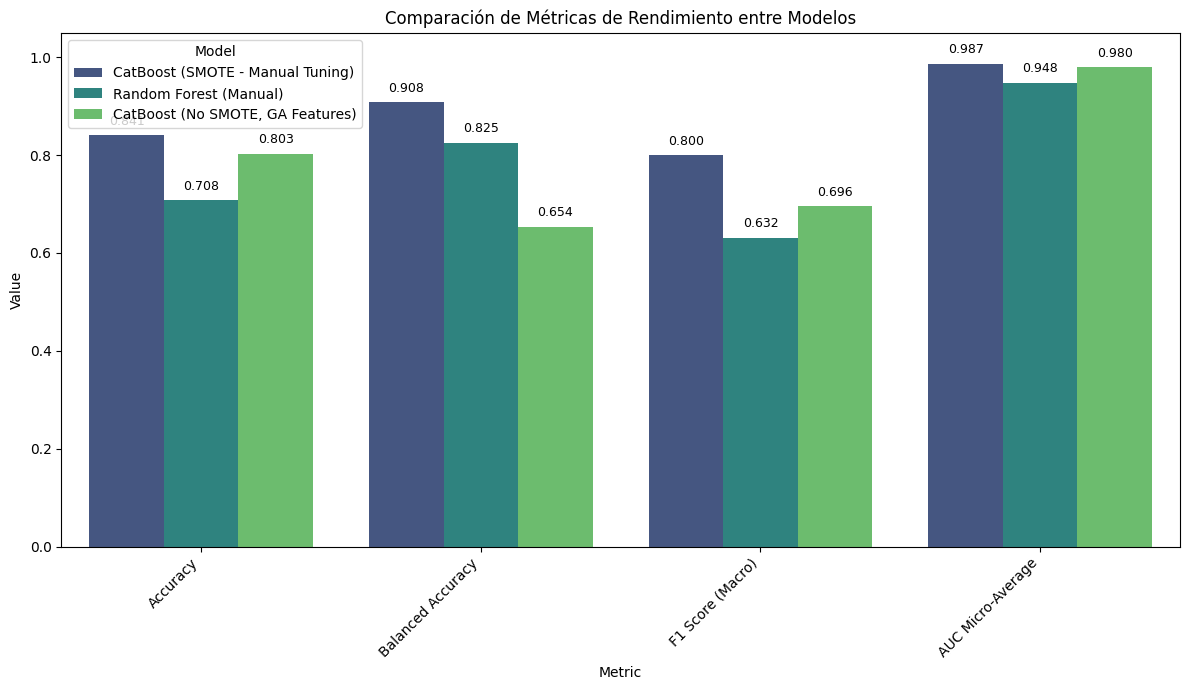

In [ ]:
print("\n" + "="*40)
print("COMPARACI\u00d3N FINAL DE MODELOS")
print("="*40 + "\n")

# Recopilar metricas para cada modelo

# 1. CatBoost con SMOTE (El que est\u00e1 en model_final con ajustes manuales)
catboost_smote_metrics = {
    'Accuracy': acc,
    'Balanced Accuracy': bal_acc,
    'F1 Score (Macro)': f1_macro,
    'AUC Micro-Average': roc_auc_cb
}

# 2. Random Forest Manual
rf_manual_metrics = {
    'Accuracy': acc_rf,
    'Balanced Accuracy': bal_acc_rf,
    'F1 Score (Macro)': f1_macro_rf,
    'AUC Micro-Average': auc_micro_rf
}

# 3. CatBoost sin SMOTE (con GA Features - Reci\u00e9n entrenado)
catboost_no_smote_ga_metrics = {
    'Accuracy': acc_no_smote_ga,
    'Balanced Accuracy': bal_acc_no_smote_ga,
    'F1 Score (Macro)': f1_macro_no_smote_ga,
    'AUC Micro-Average': auc_micro_no_smote_ga
}

# Crear DataFrame para la comparaci\u00f3n
comparison_df_final = pd.DataFrame({
    'Metric': ['Accuracy', 'Balanced Accuracy', 'F1 Score (Macro)', 'AUC Micro-Average'],
    'CatBoost (SMOTE - Manual Tuning)': list(catboost_smote_metrics.values()), # Etiqueta actualizada
    'Random Forest (Manual)': list(rf_manual_metrics.values()),
    'CatBoost (No SMOTE, GA Features)': list(catboost_no_smote_ga_metrics.values())
})

print(comparison_df_final.set_index('Metric').round(4))

# Visualizaci\u00f3n de la comparaci\u00f3n
comparison_df_melted = comparison_df_final.melt(id_vars='Metric', var_name='Model', value_name='Value')

plt.figure(figsize=(12, 7))
sns.barplot(data=comparison_df_melted, x='Metric', y='Value', hue='Model', palette='viridis')
plt.title('Comparaci\u00f3n de M\u00e9tricas de Rendimiento entre Modelos')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(f'{p.get_height():.3f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10),
                     textcoords='offset points', fontsize=9)
plt.tight_layout()
plt.show()

## CURVA ROC



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

print("Libraries for ROC curve plotting and AUC calculation imported.")

Libraries for ROC curve plotting and AUC calculation imported.


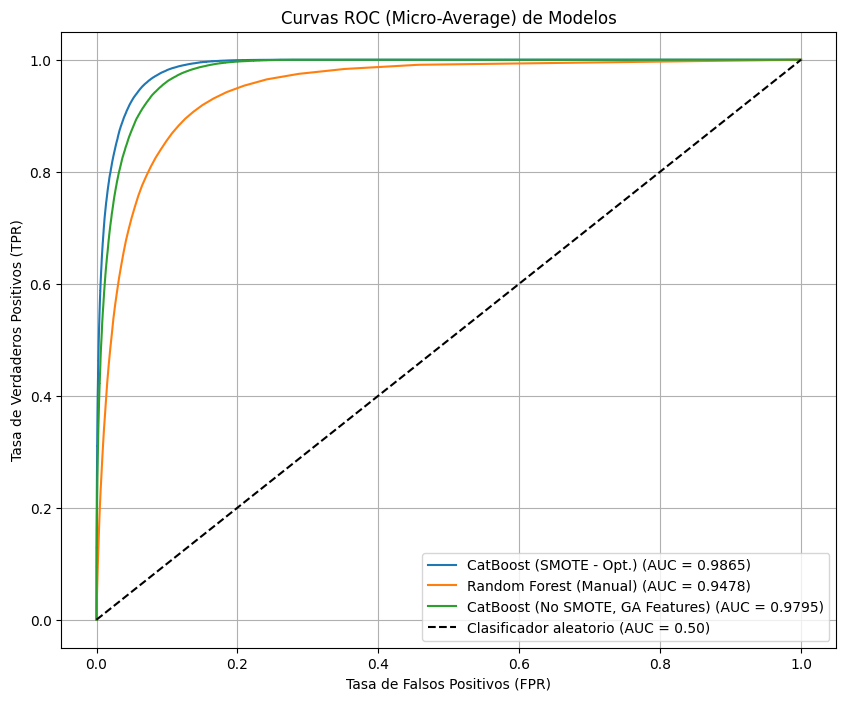

In [ ]:
def plot_roc_curve_multiclass(y_true, y_probas_dict, title='Curvas ROC (Micro-Average) de Modelos'):
    """
    Plots micro-average ROC curves for multiple models in a multi-class setting.

  Args:
    y_true (similar a un array): Etiquetas verdaderas.
    y_probas_dict (dict): Diccionario donde las claves son los nombres de los modelos (str) y los valores son
                          arrays de probabilidades predichas (n_muestras, n_clases).
    title (str): Título para el gráfico.
    """
    plt.figure(figsize=(10, 8))
    classes = np.unique(y_true)
    y_true_binarized = label_binarize(y_true, classes=classes)

    for model_name, y_proba in y_probas_dict.items():
        # Calculate micro-average ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), y_proba.ravel())
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio (AUC = 0.50)') # Random classifier
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Prepare predicted probabilities for each model
# 'y_proba' is from the CatBoost (SMOTE - Manual Tuning)
# 'y_pred_proba_rf' is from the Random Forest (Manual)
# 'y_proba_no_smote_ga' is from the CatBoost (No SMOTE, GA Features)

y_probas_to_plot = {
    'CatBoost (SMOTE - Opt.)': y_proba,
    'Random Forest (Manual)': y_pred_proba_rf,
    'CatBoost (No SMOTE, GA Features)': y_proba_no_smote_ga
}

# Call the plotting function
plot_roc_curve_multiclass(y_test_final, y_probas_to_plot)
